In [1]:
import sympy
sympy.init_printing()

# Computation of integration of Gaussian over bounding box

Given an interval, $[x_{lb},x_{ub}]$
We find
\begin{align*}
    I(\sigma, \mu, x_{lb}, x_{ub}) &= (2\pi \sigma^2)^{-1/2} \int_{x_{lb}}^{x_{ub}}
        \exp \left( \frac{-\| x - \mu \|^2}{2 \sigma^2} \right) dx \\
        &= 
\end{align*}

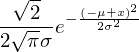

In [13]:
x, mu, x_lb, x_ub = sympy.symbols('x mu x_{lb} x_{ub}')
sigma = sympy.symbols('sigma', real=True, positive=True)
integrand = sympy.exp( -(x-mu)**2 / (2*sigma**2)) / sympy.sqrt(2*sympy.pi*sigma**2)
integrand

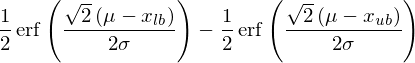

In [14]:
sympy.simplify(sympy.integrate(integrand, (x, x_lb, x_ub)))

# Computation of $\Pr(x_0, Lin, \hat{x}_0, \hat{v}_0)$
We want to derive the expression for the joing distribution $\Pr(x_0, Lin, \hat{x}_0, \hat{v}_0)$.  Using the PGM we find
$$
    \Pr(x_0, Lin, \hat{x}_0, \hat{v}_0) = \Pr(Lin) \Pr( x_0 \mid Lin) \Pr( \hat{x}_0 \mid x_0 )  \int  \Pr( v_0 \mid Lin, x_0) \Pr( \hat{v}_0 \mid v_0) dv_0
$$
Where the posteriors are given by
\begin{align*}
    \Pr( x_t \mid Lin , x_0, v_0 ) &= \delta( x_t  - (x_0 + t v_0 ) ) \\
    \Pr( x_0 \mid Lin ) &\sim \mathcal{U}(D) \\
    \Pr( v_0 \mid x_0, Lin ) &\sim \mathcal{N}(0, \sigma_L^2 ) \\
    \Pr( \hat{x}_0 \mid x_0 ) &\sim \mathcal{N}(0, \sigma_x^2 ) \\
    \Pr( \hat{v}_0 \mid v_0 ) &\sim \mathcal{N}(0, \sigma_v^2 )
\end{align*}
where $D$ is a rectangular domain.
We can integrate the integral to get the closed form solution
$$
    \Pr(x_0, Lin, \hat{x}_0, \hat{v}_0) = \frac{ \Pr(Lin) \chi( x_0 \in D)  }{ 4\pi^2 |D| \sigma_x^2 (\sigma_v^2 + \sigma_L^2) } \exp\left( - \frac{\| \hat{x}_0 - x_0 \|^2 }{2 \pi \sigma_x^2} - \frac{ \| \hat{v}_0 \|^2 / }{ 2(\sigma_v^2 + \sigma_L^2)}\right)
$$
where $|D|$ is the area of the domain.


# Computation of $\Pr(x_t, Lin, \hat{x}_0, \hat{v}_0)$
We want to derive the expression for the joing distribution $\Pr(x_t, Lin, \hat{x}_0, \hat{v}_0)$.  Using the PGM we find
$$
    \Pr(x_t, Lin, \hat{x}_0, \hat{v}_0) = \Pr(Lin) \int \Pr(x_t \mid Lin, x_0, v_0) \Pr( x_0 \mid Lin) \Pr( v_0 \mid Lin, x_0) \Pr( \hat{x}_0 \mid x_0 ) \Pr( \hat{v}_0 \mid v_0) dx_0\, dv_0
$$
Where
\begin{align*}
    \Pr( x_t \mid Lin , x_0, v_0 ) &= \delta( x_t  - (x_0 + t v_0 ) )
\end{align*}
We'd like an expression for this integral in terms of elementary and special functions.
The presence of the Dirac-delta distibution makes it easy to integrate with respect to $dx_0$.
The presence of the uniform distribution merely limits the domain of integration
This yeilds the integral with respect to $dv_0$
$$
    \Pr(x_t, Lin, \hat{x}_0, \hat{v}_0) = \frac{\Pr(Lin)}{ | D |} \int_R \Pr( v_0 \mid Lin, x_0) \Pr( \hat{x}_0 \mid x_0 ) \Pr( \hat{v}_0 \mid v_0) dv_0
$$
where $x_0 = x_t - t v_0$ and $R = (x_t-D)/t$.
All the terms under the integration are Guassian.

In [13]:
x_t, x_hat = sympy.symbols('x_t \hat{x}_0')
t, w = sympy.symbols('t w')
v, v_hat = sympy.symbols('v_0 \hat{v}_0')
sigma_x, sigma_v, sigma_L = sympy.symbols('\sigma_x \sigma_v \sigma_L')
G1 = sympy.exp( -(x_hat - x_t + t*v)**2 / (2*sigma_x**2))
G2 = sympy.exp( -(v_hat - v)**2 / (2*(sigma_v)**2))
G3 = sympy.exp( -v**2/ (2*sigma_L**2))

In [14]:
integrand = sympy.simplify(G1*G2*G3)

In [15]:
to_solve = sympy.Integral( integrand, (v, (x_t-w/2)/t, (x_t+w/2)/t ) )

We want to solve the integral:

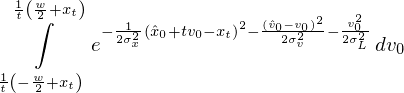

In [16]:
to_solve

In [19]:
exponent = -(v_hat-v)**2 / (2*sigma_v**2) - (t*v-x_t + x_hat)**2 / (2*sigma_x**2) - v**2 / (2*sigma_L**2)
print sympy.exp( exponent) == integrand

True


Now let's put the exponent into a negative quadratic form by completing the square.

In [20]:
def complete_the_square(q):
    """ Takes a quadratic polynomial and completes the square"""
    assert(q.degree() == 2)
    a,b,c = q.coeffs()
    h = sympy.expand( sympy.simplify(-b / (2*a)) )
    k = sympy.expand(c - b**2 / (4*a))
    return a,h,k

In [21]:
p = sympy.simplify( -2* exponent * sigma_x**2 * sigma_v**2 * sigma_L**2)
p

In [23]:
a,b,c = sympy.Poly(p,v).coeffs()
b

In [26]:
a,h,k = complete_the_square( sympy.Poly(p,v) )
a,h,k = [ sympy.simplify(_) for _ in [a,h,k] ]
sympy.simplify( sympy.expand(p - sympy.expand(a*(v-h)**2 + k))) #outputs 0 when p(u) = a(u-h)**2 + k

Now that we've written the exponent in the form $ p = a(u-h)+k$ we have transformed the integral into solving
$$
  I = \int_{u_{\min}}^{u_{\max}} e^{\frac{-1}{2 \sigma_x^2 \sigma_v^2 \sigma_L^2} ( a(v_0-h)^2 - k /2)} dv_0
$$

We can integrate with respect to $u$ to get our desired integral.  Note that:

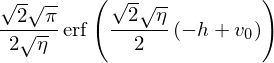

In [28]:
sympy.integrate( sympy.exp( -(v- sympy.symbols('h'))**2 * sympy.symbols('eta')/2 ),v)

Therefore, the desired integral is
$$
    I = e^{\frac{-k}{2 \sigma_x^2 \sigma_L^2 \sigma_v^2}}  \left[ \frac{ \sigma_x \sigma_L \sigma_v \sqrt{\pi} }{\sqrt{2a} } {\rm erf} \left( \sqrt{ \frac{a}{2\sigma_x^2 \sigma_v^2 \sigma_L^2}} (v_0 - h) \right) \right] \Big|_{u = (x_t - w/2)t^{-1}}^{(x_t+w/2)t^{-1}}
$$
where $a$ $h$ and $k$ are given by

In [29]:
a

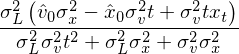

In [30]:
h

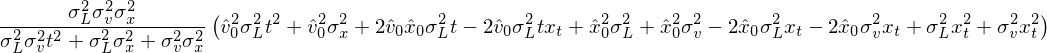

In [31]:
k

We can write $k$ more consicisely as

In [33]:
k_concise = sigma_v**2 * sigma_L**2 * (x_hat - x_t)**2 + sigma_x**2 * sigma_L**2 * v_hat**2 - sigma_L**2 * \
(v_hat * sigma_x**2 - t*sigma_v**2 * (x_hat - x_t) )**2 / (sigma_v**2 * t**2 + sigma_x**2 * (1+ (sigma_v/sigma_L)**2))

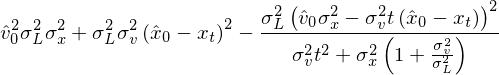

In [34]:
k_concise

In [35]:
sympy.simplify( sympy.expand(k_concise - k) ) #Should output 0 if k_concise = k

According to these calculations, the joint distribution is given by
$$
   \Pr(x_t, Lin, \hat{x}_0, \hat{v}_0) = \frac{ \Pr(Lin) e^{-\bar{k}/2} }{ 16 \pi^2 |D| a } E_0 E_1 
$$
where
\begin{align*}
    \bar{k} := \frac{k}{ \sigma_x^2 \sigma_v^2 \sigma_L^2} &= \frac{ \hat{u}^2}{ \sigma_v^2} + \frac{ (\hat{x}_0 - x_t)^2}{ \sigma_x^2}
        - \left( \hat{u} \frac{ \sigma_x}{ \sigma_v } - t (\hat{x}_0 - x_t) \frac{ \sigma_v  }{\sigma_x} \right)^2
        \left( \sigma_v^2 t^2 + \sigma_x^2 \left( 1 + \left(\frac{\sigma_v}{\sigma_L}\right)^2 \right) \right)^{-1} \\
        &= \frac{ \hat{u}^2}{ \sigma_v^2} + \frac{ (\hat{x}_0 - x_t)^2}{ \sigma_x^2}
        - \frac{\sigma_L^2}{a} \left( \hat{u} \frac{ \sigma_x}{ \sigma_v } - t (\hat{x}_0 - x_t) \frac{ \sigma_v  }{\sigma_x} \right)^2
\end{align*}
and
$$
    E_\alpha = \left. {\rm erf} \left( \sqrt{ \frac{t^2}{\sigma_x^2} + \frac{1}{\sigma_v^2} + \frac{1}{\sigma_L^2} } [u - h_\alpha] \right) \right|_{u = (x_t^\alpha - \frac{w_\alpha}{2})^{-1}}^{(x_t^\alpha + \frac{w_\alpha}{2})^{-1}}
$$
and for $\alpha = 0,1$

The log-liklihood is
$$
     \log( \Pr(Lin) ) - \frac{ \bar{k}}{2} - \log( 16 \pi^2) - \log(a) + \log(E_0) + \log(E_1).
$$
This formula might be more numerically stable.